In [ ]:
# YT REF: https://youtu.be/HmgmhOpS42A?si=yV4Ht5uRV5RFJbyG

In [8]:
import yfinance as yf
import pandas as pd

In [1]:
!pip install bsedata

In [7]:
from bsedata.bse import BSE
bse = BSE()
bse.getQuote('500180')

{'companyName': 'HDFC Bank Ltd',
 'currentValue': '1516.65',
 'change': '24.45',
 'pChange': '1.64',
 'updatedOn': '24 May 24 | 04:00 PM',
 'securityID': 'HDFCBANK',
 'scripCode': '500180',
 'group': 'A  / S&P BSE SENSEX',
 'faceValue': '1.00',
 'industry': 'Financial Services',
 'previousClose': '1492.20',
 'previousOpen': '1489.45',
 'dayHigh': '1519.95',
 'dayLow': '1487.10',
 '52weekHigh': '1757.80',
 '52weekLow': '1363.45',
 'weightedAvgPrice': '1511.19',
 'totalTradedValue': '89.49 Cr.',
 'totalTradedQuantity': '5.92 Lakh',
 '2WeekAvgQuantity': '4.81 Lakh',
 'marketCapFull': '11,53,129.36 Cr.',
 'marketCapFreeFloat': '11,41,598.06 Cr.',
 'buy': {'1': {'quantity': '-', 'price': '0.00'},
  '2': {'quantity': '-', 'price': '0.00'},
  '3': {'quantity': '-', 'price': '0.00'},
  '4': {'quantity': '-', 'price': '0.00'},
  '5': {'quantity': '-', 'price': '0.00'}},
 'sell': {'1': {'price': '0.00', 'quantity': '-'},
  '2': {'price': '0.00', 'quantity': '-'},
  '3': {'price': '0.00', 'quanti

In [9]:
bse.getQuote('500180')

{'companyName': 'HDFC Bank Ltd',
 'currentValue': '1516.65',
 'change': '24.45',
 'pChange': '1.64',
 'updatedOn': '24 May 24 | 04:00 PM',
 'securityID': 'HDFCBANK',
 'scripCode': '500180',
 'group': 'A  / S&P BSE SENSEX',
 'faceValue': '1.00',
 'industry': 'Financial Services',
 'previousClose': '1492.20',
 'previousOpen': '1489.45',
 'dayHigh': '1519.95',
 'dayLow': '1487.10',
 '52weekHigh': '1757.80',
 '52weekLow': '1363.45',
 'weightedAvgPrice': '1511.19',
 'totalTradedValue': '89.49 Cr.',
 'totalTradedQuantity': '5.92 Lakh',
 '2WeekAvgQuantity': '4.81 Lakh',
 'marketCapFull': '11,53,129.36 Cr.',
 'marketCapFreeFloat': '11,41,598.06 Cr.',
 'buy': {'1': {'quantity': '-', 'price': '0.00'},
  '2': {'quantity': '-', 'price': '0.00'},
  '3': {'quantity': '-', 'price': '0.00'},
  '4': {'quantity': '-', 'price': '0.00'},
  '5': {'quantity': '-', 'price': '0.00'}},
 'sell': {'1': {'price': '0.00', 'quantity': '-'},
  '2': {'price': '0.00', 'quantity': '-'},
  '3': {'price': '0.00', 'quanti

In [10]:
# read csv file into a dataframe
df = pd.read_csv('indian_stocks.csv')
df.ScripCode = df.ScripCode.astype(str)

In [11]:
df.ScripCode

0       500325
1       532540
2       500180
3       532174
4       500209
         ...  
1252    543230
1253    532650
1254    543644
1255    543829
1256    524394
Name: ScripCode, Length: 1257, dtype: object

In [12]:
bse.getQuote(df.ScripCode[0])['securityID']

'RELIANCE'

In [13]:
# get securityID from scrip codes
india = []
for i in df.ScripCode[:100]:
    try:
        india.append(bse.getQuote(i)['securityID'] + '.NS')
    except:
        print(i)

In [ ]:
# save india list to csv with first column name in csv as ScripCode
pd.DataFrame({"security_ids": india}).to_csv('india_security_ids.csv', index=False, header=['security_ids'])

In [14]:
indian_stock_data = yf.download(india, start="2016-01-01")

[*********************100%%**********************]  100 of 100 completed

1 Failed download:
['UNITDSPR.NS']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')


In [19]:
# save indian_stock_data to csv
indian_stock_data.to_csv('indian_stock_data.csv')

In [ ]:
# read from csv to pd
# indian_stock_data = pd.read_csv('indian_stock_data.csv')

/var/folders/ts/nfzdl4y94dz8rs1yx45svw840000gn/T/ipykernel_61817/3009729957.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = indian_stock_data['Adj Close'].pct_change()


<Axes: xlabel='Date'>

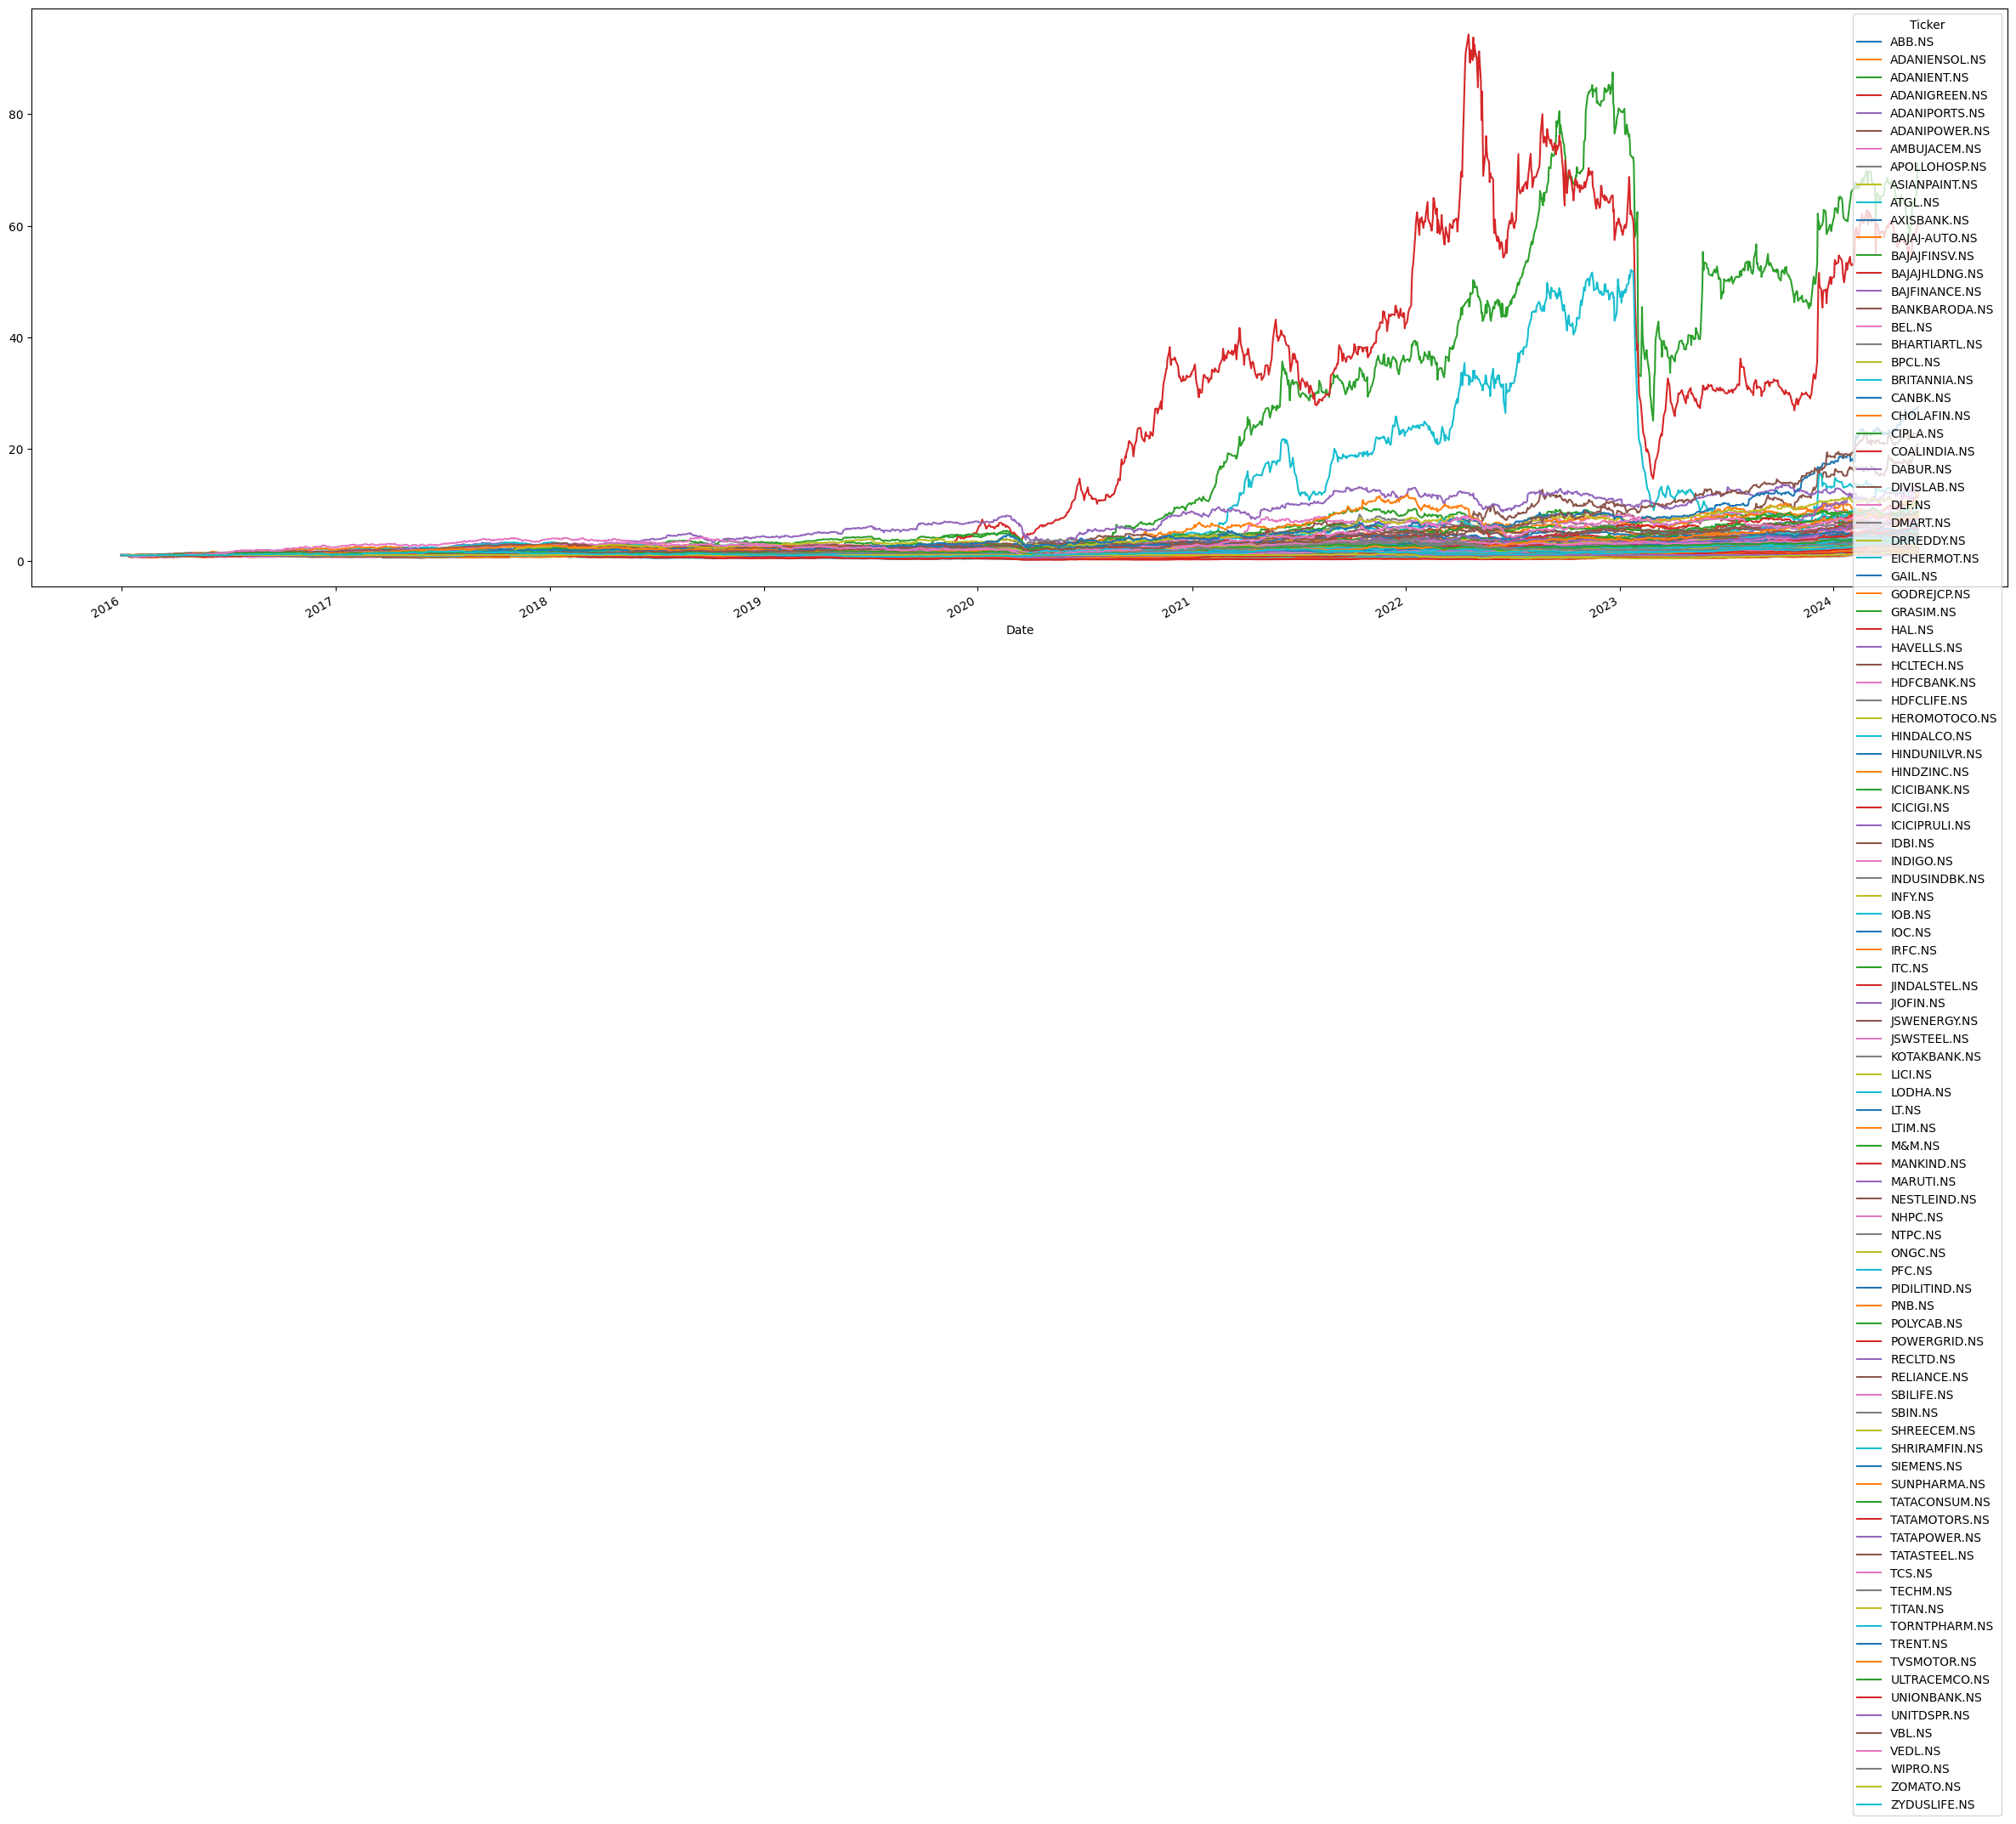

In [15]:
returns = indian_stock_data['Adj Close'].pct_change()
returns = returns.fillna(0)
(1+ returns).cumprod().plot(figsize=(30,10))

/var/folders/ts/nfzdl4y94dz8rs1yx45svw840000gn/T/ipykernel_61817/4028455216.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = indian_stock_data['Adj Close'].pct_change()


<Axes: title={'center': 'Indian Stocks'}, xlabel='Date'>

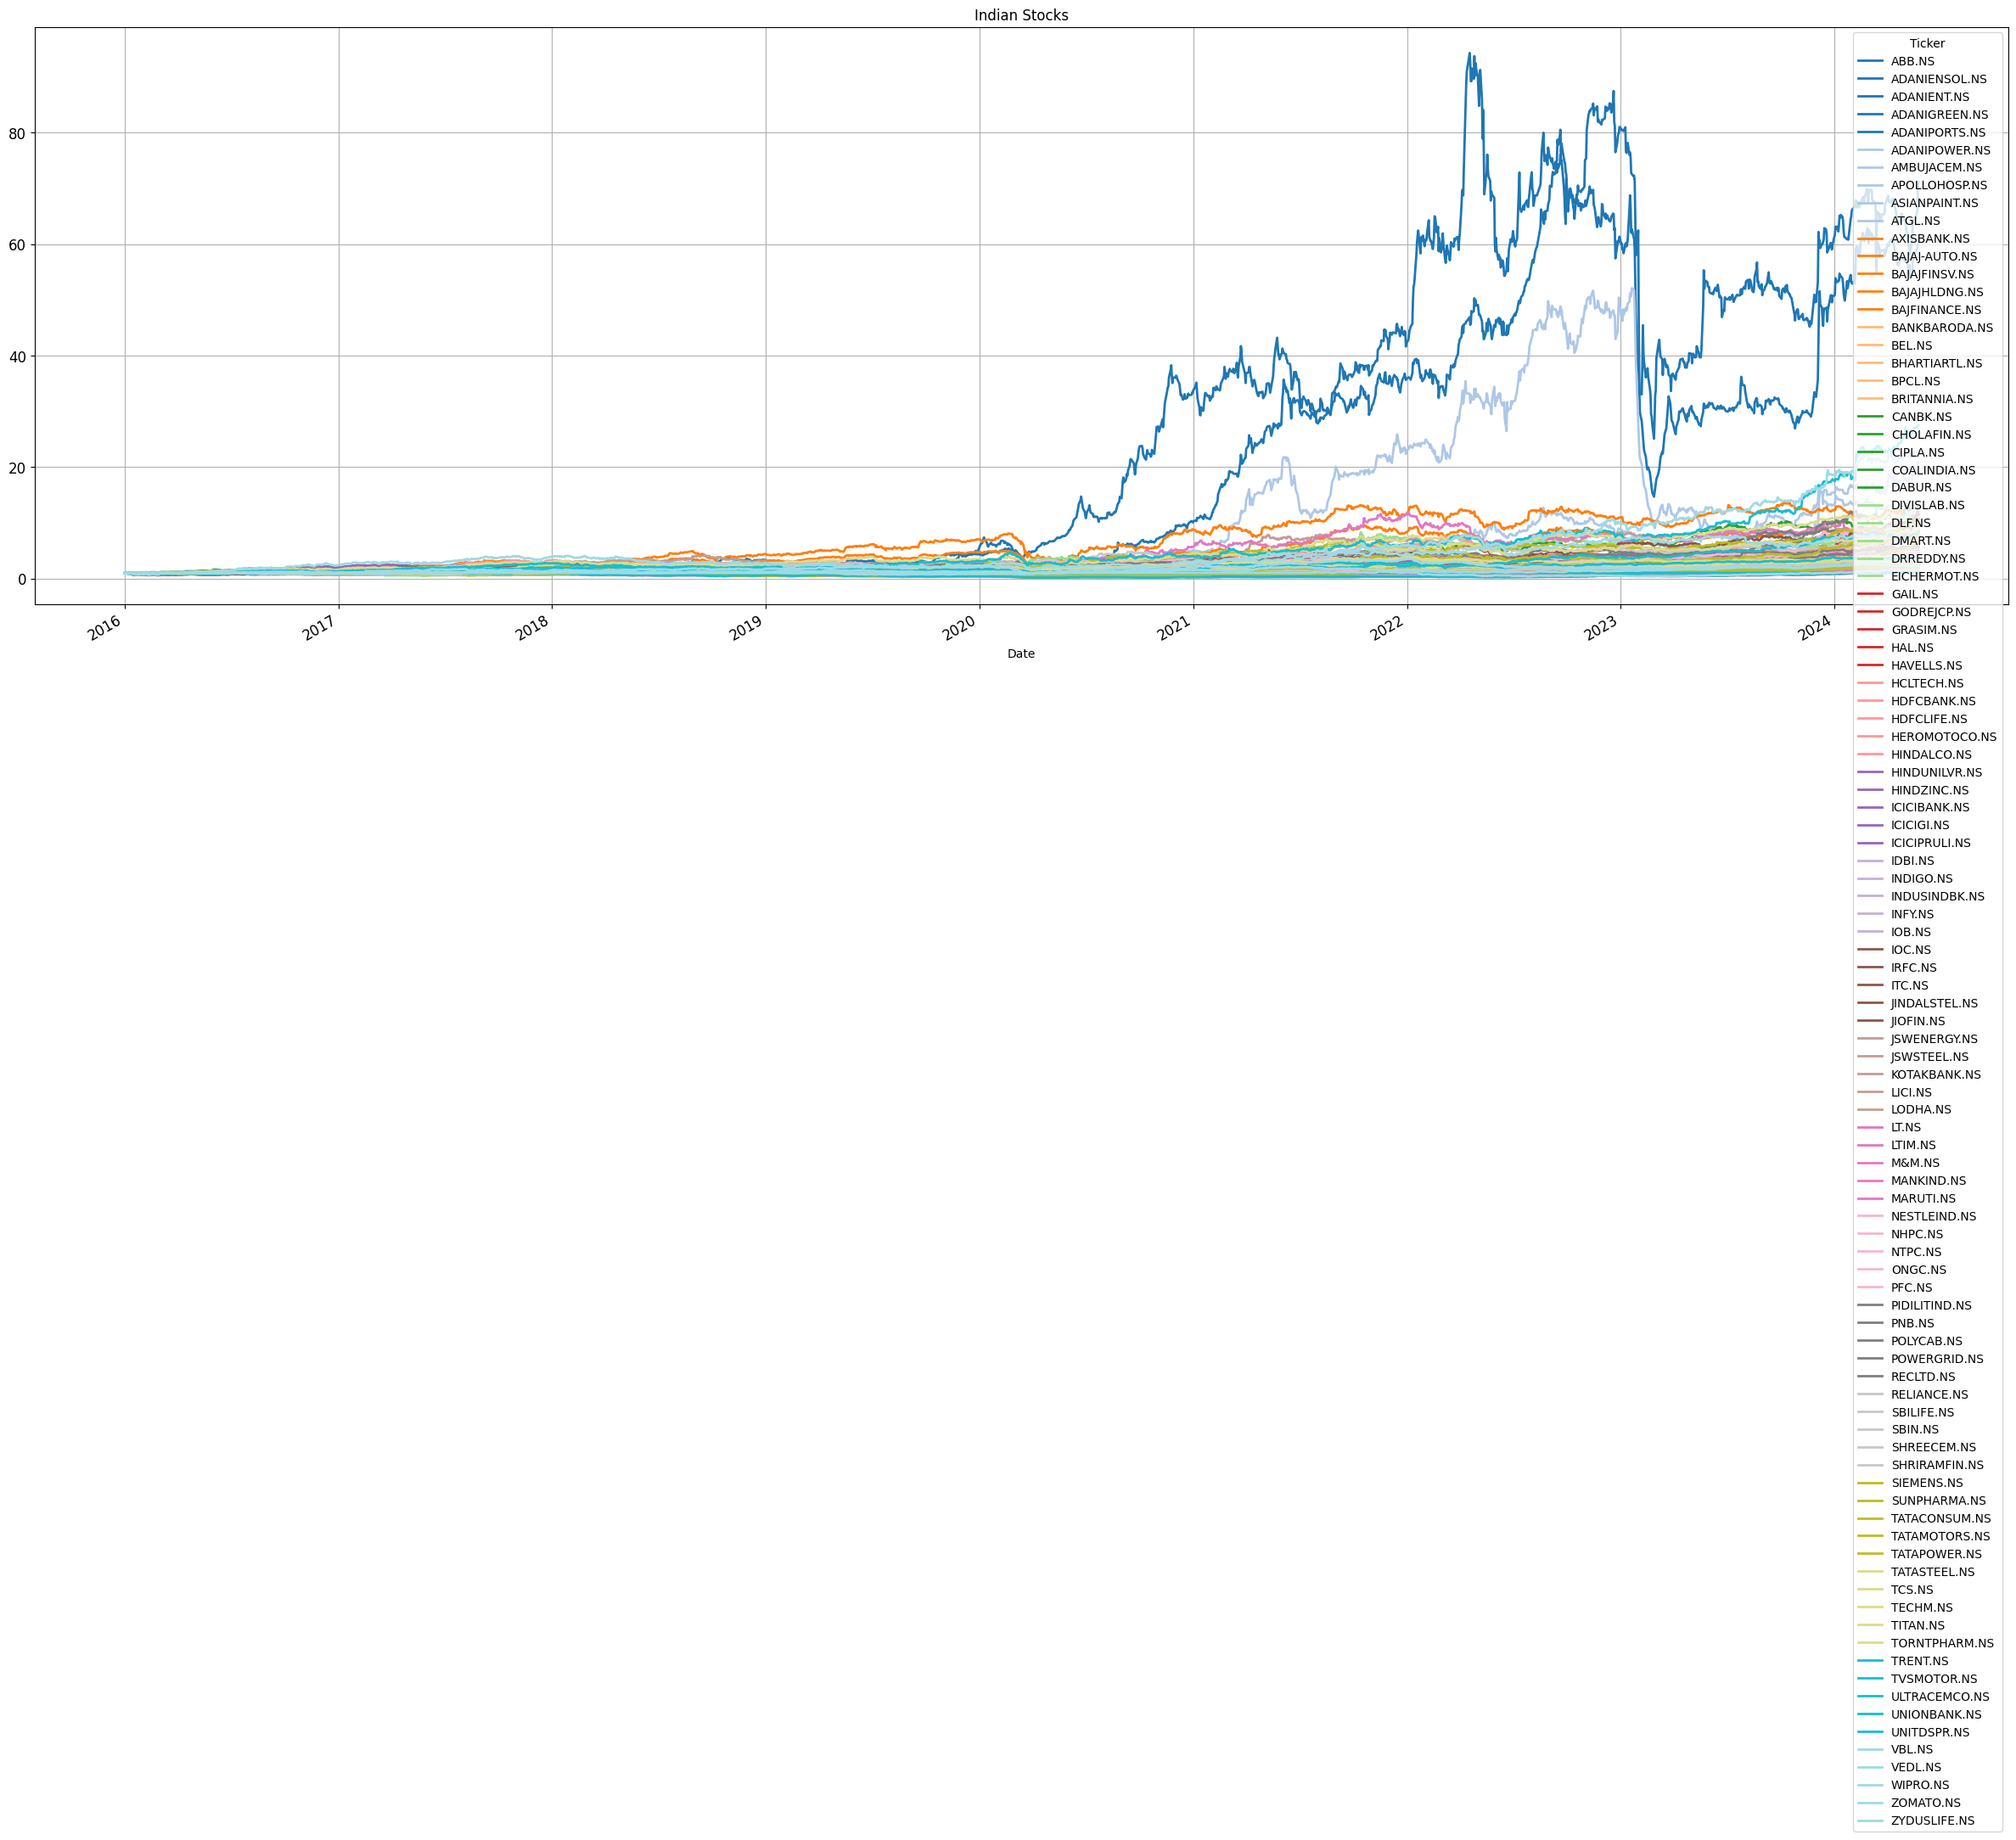

In [18]:
returns = indian_stock_data['Adj Close'].pct_change()
returns = returns.fillna(0)
x = (1+ returns).cumprod()

# pandas plot - ledger with number of stocks
x.plot(figsize=(30,10), legend=True, grid=True, title='Indian Stocks', fontsize=12, colormap='tab20', linewidth=2)
